# ✅ Predicting Obesity Levels Using Machine Learning Models Based on Physical Activity and Dietary Habits

#### Inport the required libraries

**📊 Data Manipulation and Analysis:**

-  `pandas →` Used for data manipulation and analysis, including reading CSV files, handling DataFrames.
- `numpy →` Provides support for numerical operations, including handling arrays, performing matrix operations, and mathematical computations.

**🧑‍🏫 Model Evaluation Metrics:**

-  `sklearn.metrics →` These metrics are essential for evaluating the performance of our RF and SVM models, particularly for classification tasks.

**⚙️ Preprocessing and Transformation:**

- `StandardScaler →` Standardizes features by scaling them to have a mean of 0 and standard deviation of 1. Improves model performance by normalizing the data.
- `OneHotEncoder →` Transforms categorical variables into a format that machine learning algorithms can use.
- `label_binarize →` Converts multiclass labels into a binary format, useful for ROC curve calculation in multi-class problems.

**🚦 Model Selection and Building:**

- `train_test_split →` Splits the dataset into training and testing sets for model validation.
- `RandomForestClassifier →` An ensemble learning method that uses multiple decision trees to improve accuracy and reduce overfitting.
- `SVC →` Support Vector Classifier, which uses the Support Vector Machine (SVM) algorithm for classification tasks.

**🛠️ Pipelines and Column Transformation:**

- `Pipeline →` Creates a sequential workflow for data preprocessing and model fitting. Helps avoid data leakage by bundling multiple steps into one process.
- `ColumnTransformer →` Applies different transformations (e.g., scaling, encoding) to specific columns of your dataset.

**📦 Model Saving and Loading:**

- `joblib →` Used for saving and loading machine learning models and data preprocessing pipelines, allowing you to reuse trained models without retraining them.

**📊 Visualization:**

- `matplotlib.pyplot →` Used for data visualization, including plotting histograms, ROC curves, and other charts.
- `seaborn →` An enhanced visualization library. You can uncomment it if you want to use Seaborn for better-looking plots.
-  `%matplotlib inline →` Ensures that the plots are displayed directly within Jupyter notebooks.

**⏱️ Timing Execution:**

-  `time →` Measures the execution time of your model training, which is useful for comparing the efficiency of RF and SVM models.

In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import (classification_report,
                             precision_score,
                            recall_score, 
                            f1_score,
                            confusion_matrix, 
                            accuracy_score,
                            roc_auc_score,
                            roc_curve,
                            auc,
                            )
from sklearn.preprocessing import (StandardScaler,
                                    OneHotEncoder, 
                                    label_binarize)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
import time
%matplotlib inline

# data preprocessing and model pipeline setup 

- **Load Data:** The dataset is loaded from a CSV file into a DataFrame df using pandas.read_csv.

- **Define Features and Target:** The features (X_data) are all columns except "NObeyesdad", which is assumed to be the target variable (Y_data).

- **Identify Feature Types:** The code identifies numeric features (integers and floats) and categorical features (objects/strings) from X_data.

- **Preprocessing for Numeric Features and Categorical Features:** A Pipeline is created to scale numeric features using StandardScaler and  to encode categorical features using OneHotEncoder.

- **Create Preprocessor:** A `ColumnTransformer` is defined to apply the numeric and categorical transformations to their respective feature types.

- **Model Pipelines:** `Random Forest` and `Support vector` machine learning pipelines are created. The pipelines include the preprocessor followed by the respective classifier, ensuring that data is preprocessed before being fed into the models.

In [28]:
# Load the data
data_path = "data/Cleaned_ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(data_path)

# Define the features and the target
X_data = df.drop("NObeyesdad", axis=1)  # Assuming 'NObeyesdad' is the target
Y_data = df["NObeyesdad"]

# Identify numeric and categorical features
numeric_features = X_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_data.select_dtypes(include=['object']).columns

# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode using one hot encoder)
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipelines for LDA, Random Forest and SVM
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])

 # Perforrming Train-test split on the dataset:

- **Split the Data:** The features `(X_data)` and target `(Y_data)` are split into training (80%) and testing sets (20%) using `train_test_split` from `sklearn.model_selection`.

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1669, 16) (418, 16) (1669,) (418,)


# Trains, Test,  saves machine learning models and  store their predictions

- **Model Dictionary:** A dictionary models is created to store the model pipelines for `Random Forest` and `SVM`.

- **Initialize Predictions Storage:** A dictionary models_prediction is initialized to store the true test labels `(y_test)` and model predictions.

- **Training and Evaluation Loop:** For each model in the models dictionary:

  - **Training:** The model is trained on the training data `(X_train, y_train)`, and the training time is measured and printed.
  -  **Prediction:** The model makes predictions on the test data `(X_test)`, and these predictions are stored in models_prediction.
  - **Model Saving:** The trained model is saved to a file using `joblib.dump`, with the filename indicating the model type.
  - **Model Deletion:** The model is deleted from memory to free up resources.
- **Save Predictions:** The models_prediction dictionary is converted to a DataFrame and saved as a CSV file, models_predictions.csv, in the `experiment_results` directory.

In [30]:

models = {"RandomForest": rf_pipeline, "SVM": svm_pipeline}

models_prediction = {'y_test': y_test}
# Train, evaluate, and save models
for name, model in models.items():
    # Train the model
    print(f"Training {name} model...")
    start = time.time()
    model.fit(X_train, y_train)
    # End time
    end = time.time()
    print(f"Training time: {end - start:.2f}s")

    # Predict
    y_pred = model.predict(X_test)

    prediction_name = f"{name.lower()}_predictions"
    predictions_results = {prediction_name: y_pred}
    models_prediction.update(predictions_results)
    
    # Save the model
    model_name = f"./models/{name.lower()}_model.pkl"
    joblib.dump(model, model_name)

    # delete the model
    del model
models_prediction_df = pd.DataFrame(models_prediction)
# Assuming df is your DataFrame and you want to insert a new column 'new_column'
models_prediction_df.to_csv("./experiment_results/models_predictions.csv", index=False)
print("Models true value and predictions saved in experiment_results/models_predictions.csv")

Training RandomForest model...
Training time: 0.22s
Training SVM model...
Training time: 0.05s
Models true value and predictions saved in experiment_results/models_predictions.csv


 # Performance Measurement customized Function for Classification Models

- This function, **performance_measure**, calculates and returns a DataFrame containing key performance metrics—**accuracy, precision, recall, and F1 score**—for a given model's predictions. The metrics are computed using the true labels `(Y_true)` and predicted labels `(Y_pred)`, and the results are labeled with the model_name for easy identification.

In [31]:
def performance_measure(Y_true, Y_pred, model_name):
    # Calculate precision, recall, f1 score, and accuracy
    accuracy = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred, average='weighted')
    recall = recall_score(Y_true, Y_pred, average='weighted')
    f1 = f1_score(Y_true, Y_pred, average='weighted')

    performance = {'Accuracy': round(accuracy,3), 
                    'precision': round(precision, 3),
                    'recall': round(recall, 3), 
                    'f1_score': round(f1, 3)}
    df = pd.DataFrame([performance])
    df.rename(index = {0:model_name}, inplace = True)
    return df

# Evaluate and Save Model Performance Metrics

- This next cell evaluates the performance of the two models by calculating accuracy, precision, recall, and F1 score for each model's predictions stored in models_prediction_df. It iterates over the columns of the DataFrame, skipping the first column (which contains true labels, `y_test`), and uses the performance_measure function to compute metrics for each model. The results are stored in a list, concatenated into a single DataFrame accuracy_results, and saved as a CSV file named `models_performance.csv` in the `experiment_results` directory.

In [32]:
accuracy_results = []
for i, name in enumerate(models_prediction_df.columns):
    if i > 0:
        #print(i, name)
        accuracy_results.append(performance_measure(models_prediction_df.iloc[:,0], models_prediction_df.iloc[:,i], name))
accuracy_results = pd.concat(accuracy_results)
accuracy_results.to_csv("./experiment_results/models_performance.csv")
print("Models performance saved in experiment_results/models_performance.csv")
accuracy_results

Models performance saved in experiment_results/models_performance.csv


,Accuracy,precision,recall,f1_score
randomforest_predictions,0.945,0.948,0.945,0.946
svm_predictions,0.914,0.916,0.914,0.914


# Generate and Display Classification Reports for Model Predictions

- This code in the next cell iterates over the columns of models_prediction_df, which contains true labels and model predictions. 
- For each model's predictions (skipping the first column of true labels), it prints the column index and name, followed by a detailed classification report. 
- The `classification_report function from sklearn.metrics` is used to generate the report, which includes precision, recall, F1 score, and support for each class, providing a comprehensive evaluation of each model's performance.



In [33]:
for i, name in enumerate(models_prediction_df.columns):
    if i > 0:
     print(i, name, '\n')
     
     print(classification_report(models_prediction_df.iloc[:,0], models_prediction_df.iloc[:,i]))

1 randomforest_predictions 

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.92      0.93        59
      Normal_Weight       0.81      0.90      0.85        61
     Obesity_Type_I       1.00      0.96      0.98        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.94      0.87      0.91        55
Overweight_Level_II       0.92      0.96      0.94        49

           accuracy                           0.94       418
          macro avg       0.95      0.94      0.94       418
       weighted avg       0.95      0.94      0.95       418

2 svm_predictions 

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.85      0.89        59
      Normal_Weight       0.80      0.84      0.82        61
     Obesity_Type_I       0.96      0.97      0.96        70
    Obesity_Type_II       1.00  

#  Visualize Confusion Matrices for Model Predictions

- The next cell computes and visualizes **confusion matrices** for the predictions of `Random Forest` and `SVM` models. 
- It uses `confusion_matrix` from `sklearn.metrics` to calculate the matrices based on true labels and predicted labels from models_prediction_df.
- The `confusion matrices` are then plotted using seaborn's **heatmap** function, with annotations for clarity. 
- The plots are displayed side-by-side in a single figure, with titles and axis labels emphasizing the predicted versus actual values. 
- This visualization helps in understanding the classification performance and error distribution of each model.

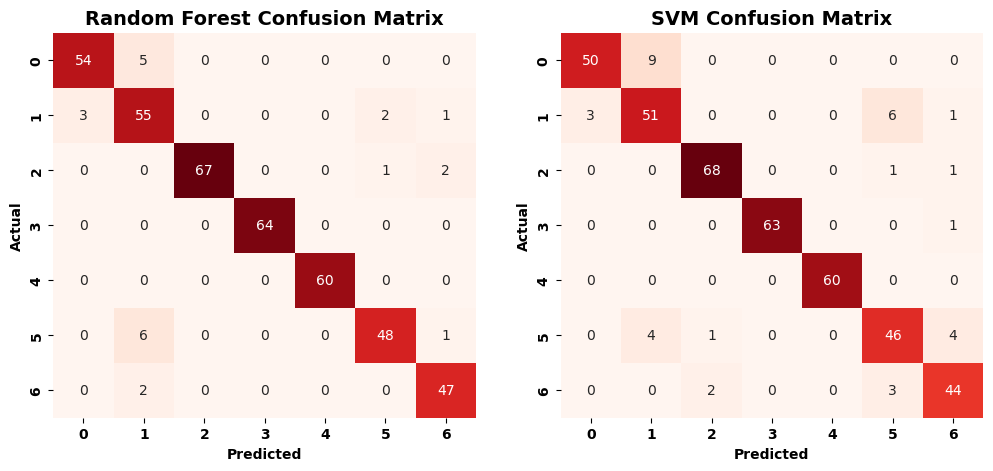

In [34]:
# Compute confusion matrices
rf_cm = confusion_matrix(models_prediction_df.iloc[:,0], models_prediction_df.iloc[:,1])
svm_cm = confusion_matrix(models_prediction_df.iloc[:,0], models_prediction_df.iloc[:,2])

# Plot confusion matrix for Random Forest
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Random Forest Confusion Matrix', fontsize = 14, fontweight = 'bold')
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

# Plot confusion matrix for SVM
plt.subplot(1, 2, 2)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('SVM Confusion Matrix', fontsize = 14, fontweight = 'bold')
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

# plt.tight_layout()
plt.show()

# ROC Curve Visualization for Random Forest and SVM Models

Finally, the next cell visualizes the **Receiver Operating Characteristic (ROC)** curves for `Random Forest` and `SVM` models in a multi-class classification setting. Here's a breakdown of the process:

- **Binarize Labels:** The true and predicted labels are binarized using `label_binarize` to convert them into a one-vs-all fashion., which is necessary for multi-class ROC analysis.

-  **Compute ROC Curves and AUC:** For each class, the false positive rate (FPR), true positive rate (TPR), and area under the curve (AUC) are computed using `roc_curve` and `auc` from `sklearn.metrics`. This is done separately for both Random Forest and SVM models.

- *Macro-Average ROC:* A macro-average ROC curve is computed, which aggregates the performance across all classes.

-  **Plot ROC Curves:** The ROC curves for each class and the macro-average are plotted for both models:

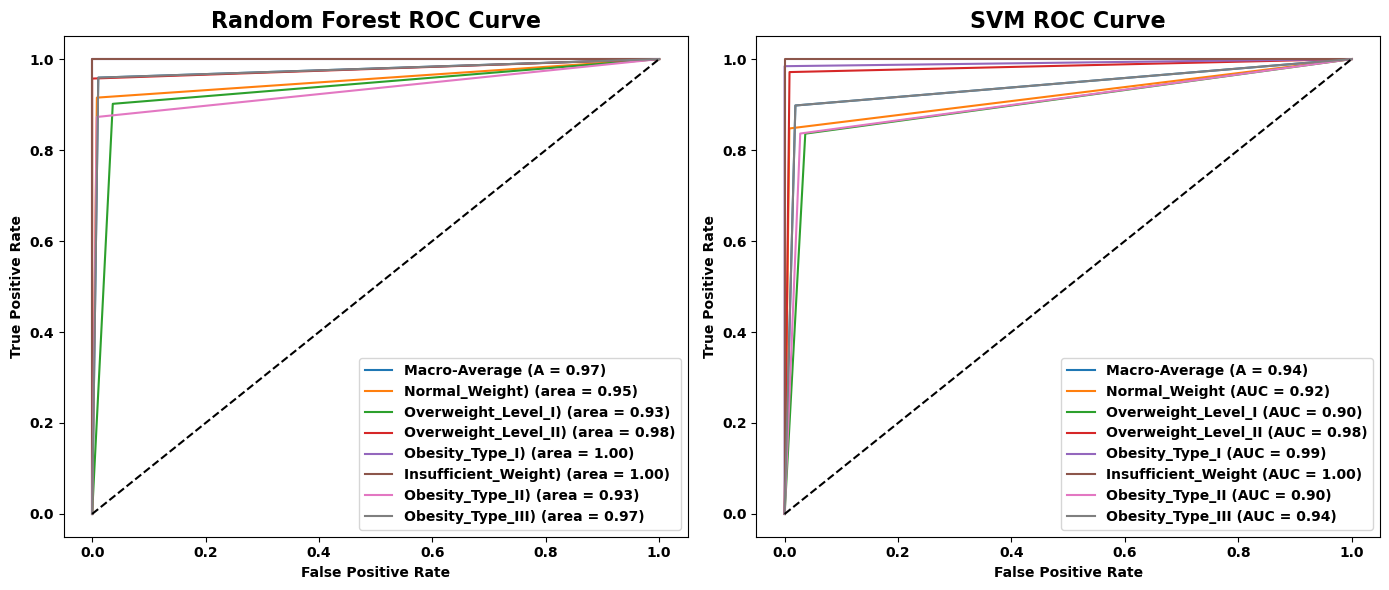

In [35]:
# Binarize the output labels (convert them to one-vs-rest format for multi-class precision-recall)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_rf_pred_bin = label_binarize(models_prediction_df.iloc[:,1], classes=np.unique(y_test))
y_svm_pred_bin = label_binarize(models_prediction_df.iloc[:,2], classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr_rf, tpr_rf, roc_auc_rf = dict(), dict(), dict()
fpr_svm, tpr_svm, roc_auc_svm = dict(), dict(), dict()

classes = list(Y_data.unique())
for i, label in enumerate(classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_rf_pred_bin[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])
    
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin[:, i], y_svm_pred_bin[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Compute macro-average ROC curve and ROC area (aggregate of all classes)
fpr_rf["macro"], tpr_rf["macro"], _ = roc_curve(y_test_bin[:, i].ravel(), y_rf_pred_bin[:, i].ravel())
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

fpr_svm["macro"], tpr_svm["macro"], _ = roc_curve(y_test_bin[:, i].ravel(), y_svm_pred_bin[:, i].ravel())
roc_auc_svm["macro"] = auc(fpr_svm["macro"], tpr_svm["macro"])

# Plot ROC curves
plt.figure(figsize=(14, 6))

# Random Forest ROC curve
plt.subplot(1, 2, 1)

plt.plot(fpr_rf["macro"], tpr_rf["macro"], 
             label='Macro-Average (A = {0:0.2f})'.format(roc_auc_rf["macro"]))

for i, label in enumerate(classes):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f'{label}) (area = {roc_auc_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('Random Forest ROC Curve', fontsize = 16, fontweight = 'bold')
plt.xlabel('False Positive Rate', fontweight = 'bold')
plt.ylabel('True Positive Rate', fontweight = 'bold')
plt.legend(loc="lower right", prop = {'weight':'bold'})
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

# SVM ROC curve
plt.subplot(1, 2, 2)

plt.plot(fpr_svm["macro"], tpr_svm["macro"], 
             label='Macro-Average (A = {0:0.2f})'.format(roc_auc_svm["macro"]))

for i, label in enumerate(classes):
    plt.plot(fpr_svm[i], tpr_svm[i], label=f'{label} (AUC = {roc_auc_svm[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('SVM ROC Curve', fontsize = 16, fontweight = 'bold')
plt.xlabel('False Positive Rate', fontweight = 'bold')
plt.ylabel('True Positive Rate',  fontweight = 'bold')
plt.legend(loc="lower right",  prop = {'weight':'bold'})
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.tight_layout()
plt.show()